This example is from "" git hub repository and is the step 9: 2D Laplace Equation

In the previous step, we solved the [2D Burgers' equation](./10_Step_8.ipynb): an important equation in the study of fluid mechanics because it contains the full convective nonlinearity of the flow equations. With that exercise, we also build the experience to incrementatlly code a Navier–Stokes solver.

In the next two steps, we will solve Laplace and then Poisson equation. We will then put it all together!

Step 9: 2D Laplace Equation
----
***

Here is Laplace's equation in 2D:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = 0$$

We know how to discretize a 2nd order derivative. But think about this for a minute — Laplace's equation has the features typical of diffusion phenomena. For this reason, it has to be discretized with *central differences*, so that the discretization is consistent with the physics we want to simulate. 

#### Personal Note
Detailed Explanation of the Connection to Diffusion Phenomena
1. Steady-state behavior
Laplace's equation (∇²φ = 0) describes the steady-state condition of many physical systems. Let's break this down:
Heat conduction: In a system where heat has been flowing for a long time and reached equilibrium, the temperature distribution satisfies Laplace's equation. This means no further changes in temperature occur over time.
Electrostatics: The electric potential in a region with no charges also satisfies Laplace's equation. This represents a stable configuration of the electric field.
Fluid flow: In ideal, incompressible, irrotational fluid flow, the velocity potential satisfies Laplace's equation, representing a steady-state flow pattern.
2. Smoothing effect
The solutions to Laplace's equation exhibit a characteristic smoothing behavior:
No local extrema: According to the maximum principle, solutions to Laplace's equation cannot have local maxima or minima within the interior of the domain. Extrema can only occur at the boundaries.
Averaging property: The value of the solution at any point is the average of the values in a small sphere around that point. This leads to a natural smoothing effect.
Analogy to diffusion: This smoothing is analogous to how diffusion processes tend to even out concentrations or temperatures over time. For example, a drop of ink in water will spread out, smoothing the concentration gradient.
3. Flux balance
Laplace's equation implies a balance of fluxes, which is a key characteristic of diffusion processes at equilibrium:
Mathematical interpretation: The Laplacian (∇²φ) represents the divergence of the gradient of φ. When this is zero, it means that the inward flux equals the outward flux at every point.
Physical meaning: In heat conduction, for instance, this means that at each point, the amount of heat flowing in equals the amount flowing out, resulting in no net accumulation or depletion of heat.
Equilibrium state: This flux balance is characteristic of diffusion processes that have reached equilibrium. At this point, the system is in a steady state with no net movement of the diffusing quantity.
#### Additional Insights
1. Time-dependent diffusion: While Laplace's equation describes the steady-state, the time-dependent version is the diffusion equation (or heat equation): ∂φ/∂t = D∇²φ, where D is the diffusion coefficient.
2. Green's functions: Solutions to Laplace's equation can be constructed using Green's functions, which also have interpretations related to diffusion processes.
3. Probabilistic interpretation: The connection to diffusion extends to probability theory. Solutions to Laplace's equation are related to the probability distribution of random walks, which model diffusion processes.
4. Applications in other fields: The connection between Laplace's equation and diffusion phenomena extends to fields like finance (Black-Scholes equation), image processing (heat equation for image smoothing), and even social sciences (modeling of population dynamics).

Understanding this deep connection between Laplace's equation and diffusion phenomena provides valuable insights into a wide range of physical processes and helps in developing effective numerical methods for simulating these phenomena.

The use of central differences for discretizing Laplace's equation is crucial for maintaining consistency with the physical behavior we're trying to simulate. Here's why:
1. Symmetry: Central differences use information from both sides of a point equally, which matches the symmetric nature of diffusion processes.
2. Second-order accuracy: Central differences provide second-order accuracy, which is important for capturing the second-order derivatives in Laplace's equation.
3. Conservation properties: Central differences help maintain important conservation properties of the original equation, which is crucial for physical consistency.
4. Stability: When used appropriately, central differences can lead to stable numerical schemes for Laplace's equation.

##### Diffusion Phenomena
Diffusion is a fundamental process in nature where particles or energy spread out from areas of high concentration to areas of low concentration. This process is ubiquitous in physics, chemistry, biology, and even social sciences.

Key Characteristics of Diffusion
1. Gradient-driven: Diffusion occurs due to concentration gradients. Particles move from high to low concentration areas.
2. Random motion: At the microscopic level, diffusion is driven by random motion of particles (Brownian motion).
3. Flux: The rate of diffusion is described by the flux, which is proportional to the concentration gradient (Fick's first law).
4. Time-dependent: Diffusion processes evolve over time, typically leading to a more uniform distribution.

Mathematical Description of Diffusion
The diffusion process is typically described by the diffusion equation:
∂φ/∂t = D∇²φ
Where:
φ is the quantity being diffused (e.g., concentration, temperature)
t is time
D is the diffusion coefficient
∇² is the Laplace operator

Connection to Laplace's Equation
Laplace's equation (∇²φ = 0) is closely related to the diffusion equation in several ways:
Steady-state diffusion: When a diffusion process reaches equilibrium, ∂φ/∂t = 0, and the diffusion equation reduces to Laplace's equation.
Smoothing behavior: Both equations lead to solutions that smooth out irregularities over time or space.
No internal sources or sinks: Laplace's equation describes a situation where there are no sources or sinks within the domain, similar to conservative diffusion processes.
Flux balance: Solutions to Laplace's equation exhibit a balance of fluxes, mirroring the equilibrium state of diffusion processes.
Examples of Diffusion-Like Processes Described by Laplace's Equation
Heat conduction in steady-state: When a temperature distribution has stabilized, it satisfies Laplace's equation.
Electrostatics: The electric potential in charge-free regions satisfies Laplace's equation, analogous to the diffusion of electric field lines.
Fluid flow: In ideal, incompressible, irrotational flows, the velocity potential satisfies Laplace's equation, representing a kind of "diffusion" of momentum.
Concentration equilibrium: In a system where diffusing particles have reached a stable distribution, the concentration profile satisfies Laplace's equation.
Numerical Considerations
When simulating diffusion-like processes described by Laplace's equation:
Central differences: As mentioned earlier, central difference schemes are preferred for discretization to maintain the symmetry inherent in diffusion processes.
Iterative methods: Solving discretized Laplace's equation often involves iterative methods like Jacobi or Gauss-Seidel, which themselves mimic a diffusion-like process as they converge to the solution.
Stability considerations: While Laplace's equation itself doesn't have stability issues (being time-independent), the numerical methods used to solve it may require careful consideration of stability, especially if extended to time-dependent problems.
Understanding the connection between Laplace's equation and diffusion phenomena provides valuable insights for both analytical and numerical approaches to a wide range of physical problems. It underscores the importance of using appropriate discretization methods that respect the underlying physics of diffusion-like processes.

#### End

The discretized equation is:

$$\frac{p_{i+1, j}^n - 2p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \frac{p_{i,j+1}^n - 2p_{i,j}^n + p_{i, j-1}^n}{\Delta y^2} = 0$$

Notice that the Laplace Equation does not have a time dependence — there is no $p^{n+1}$.  Instead of tracking a wave through time (like in the previous steps), the Laplace equation calculates the equilibrium state of a system under the supplied boundary conditions.  

If you have taken coursework in Heat Transfer, you will recognize the Laplace Equation as the steady-state heat equation.  

Instead of calculating where the system will be at some time $t$, we will iteratively solve for $p_{i,j}^n$ until it meets a condition that we specify.  The system will reach equilibrium only as the number of iterations tends to $\infty$, but we can approximate the equilibrium state by iterating until the change between one iteration and the next is *very* small.  

Let's rearrange the discretized equation, solving for $p_{i,j}^n$:

$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

Using second-order central-difference schemes in both directions is the most widely applied method for the Laplace operator. It is also known as the **five-point difference operator**, alluding to its stencil.

We are going to solve Laplace's equation numerically by assuming an initial state of $p=0$ everywhere. Then we add boundary conditions as follows:

$p=0$ at $x=0$

$p=y$ at $x=2$

$\frac{\partial p}{\partial y}=0$ at $y=0, \ 1$

Under these conditions, there is an analytical solution for Laplace's equation:

$$p(x,y)=\frac{x}{4}-4\sum_{n=1,odd}^{\infty}\frac{1}{(n\pi)^2\sinh2n\pi}\sinh n\pi x\cos n\pi y$$

100%|██████████| 500/500 [00:00<00:00, 14106.66it/s]


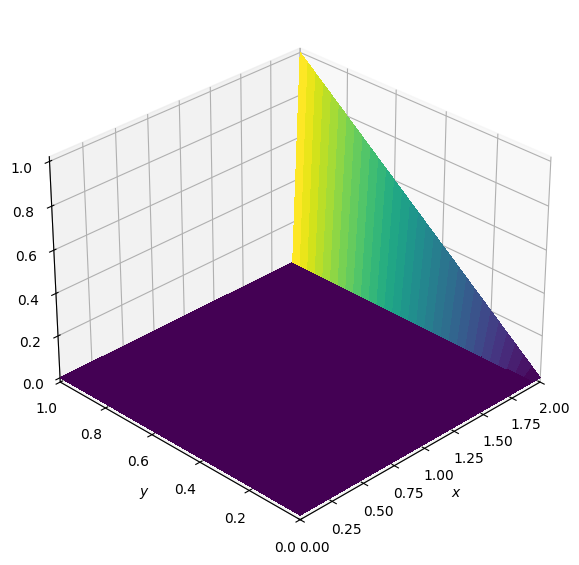

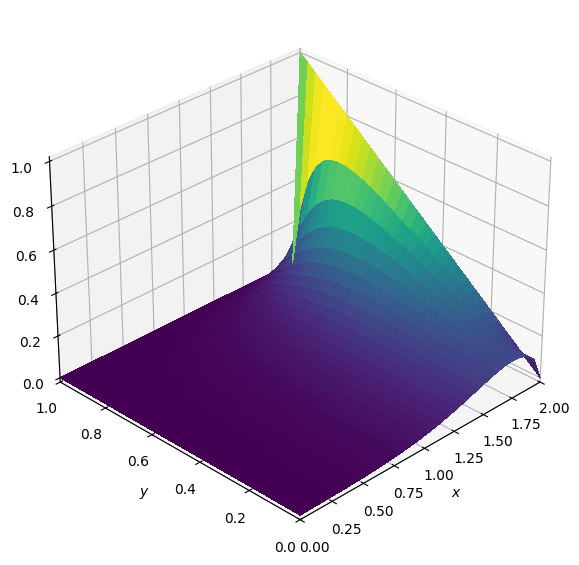

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, cm
from tqdm import tqdm

from difference_equations import DiscretizationSchemes
from grid import MeshGrid
from input_variables import *
from matrix_init import MatrixInitializer
from physics import *
from test import TestStability
from visualization import Visual

def main ():
    params = SetupParameters(nx=31, ny=31, lx=2, ly=1, nppi=500)
    
    p_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    y = np.linspace(0, params.ly, params.ny)
    p_prev[-1,:] = p_prev[-2,0] # Top boundary
    p_prev[0,:] = p_prev[1,:]# bottom boundary condition
    p_prev[:,0] = 0 # left boundary condition, dp/dy = 0 @ y = 0
    p_prev[:,-1] = y # right boundary condition, dp/dy = 0 @ y = 1
     
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    X, Y, dx, dy = MeshGrid.mesh(params.nx, params.ny, params.lx, params.ly)
    surf = ax.plot_surface(X, Y, p_prev[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    
    # y = np.linspace(0, params.ly, params.ny)
    # p_prev[-1,:] = p_prev[-2,0] # Top boundary
    # p_prev[0,:] = p_prev[1,:]# bottom boundary condition
    # p_prev[:,0] = 0 # left boundary condition, dp/dy = 0 @ y = 0
    # p_prev[:,-1] = y # right boundary condition, dp/dy = 0 @ y = 1
    # p_tent = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    p_tent = PressurePoisson.laplace_pressure_2d(p_prev, params.dx, params.dy, params.nx, params.ny, params.nppi)
       
    
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    X, Y, dx, dy = MeshGrid.mesh(params.nx, params.ny, params.lx, params.ly)
    surf = ax.plot_surface(X, Y, p_tent[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    
if __name__ == "__main__":
    main()